In [1]:
# Jadyn Gonzalez
# 2290329
# CPSC392 Assignment 2

from plotnine import *
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('~/Desktop/ChapmanSpring20/DataScience/Assignment01/nba-elo.csv')
data.head()

,gameorder,game_id,lg_id,X_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,61847,201410280LAL,NBA,1,2015,10/28/2014,1,0,HOU,Rockets,...,51.586834,LAL,Lakers,90,1421.9985,1410.6588,A,W,0.605553,NaN
1,61847,201410280LAL,NBA,0,2015,10/28/2014,1,0,LAL,Lakers,...,31.337477,HOU,Rockets,108,1596.4641,1607.8038,H,L,0.394447,NaN
2,61848,201410280NOP,NBA,0,2015,10/28/2014,1,0,NOP,Pelicans,...,36.695789,ORL,Magic,84,1359.4265,1353.2910,H,W,0.757419,NaN
3,61848,201410280NOP,NBA,1,2015,10/28/2014,1,0,ORL,Magic,...,25.881901,NOP,Pelicans,101,1457.2185,1463.3540,A,L,0.242581,NaN
4,61849,201410280SAS,NBA,0,2015,10/28/2014,1,0,SAS,Spurs,...,60.040932,DAL,Mavericks,100,1592.0101,1590.3984,H,W,0.767531,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622 entries, 0 to 2621
Data columns (total 23 columns):
gameorder        2622 non-null int64
game_id          2622 non-null object
lg_id            2622 non-null object
X_iscopy         2622 non-null int64
year_id          2622 non-null int64
date_game        2622 non-null object
seasongame       2622 non-null int64
is_playoffs      2622 non-null int64
team_id          2622 non-null object
fran_id          2622 non-null object
pts              2622 non-null int64
elo_i            2622 non-null float64
elo_n            2622 non-null float64
win_equiv        2622 non-null float64
opp_id           2622 non-null object
opp_fran         2622 non-null object
opp_pts          2622 non-null int64
opp_elo_i        2622 non-null float64
opp_elo_n        2622 non-null float64
game_location    2622 non-null object
game_result      2622 non-null object
forecast         2622 non-null float64
notes            4 non-null object
dtypes: float64(6), int

### Checking Data Types
- We see the data types for each attribute above, the following 
    the following attributes are of int type so we need to cast them as
    categorical variables for analysis

In [7]:
data['X_iscopy'] = data['X_iscopy'].astype('category')
data['yesr_id'] = data['year_id'].astype('category')
data['seasongame'] = data['seasongame'].astype('category')
data['is_playoffs'] = data['is_playoffs'].astype('category')
data['game_location'] = data['game_location'].astype('category')
data['game_result'] = data['game_result'].astype('category')

### Missing Data
- The only attribute tha tis missing data is 'notes'
    below we retrieved the non-null values of 'notes'
    we can see that it does not contain relevant data for
    analysis/predictions so we can ignore it and drop the column later if needed

In [8]:
data['notes'].loc[data['notes'].notnull()]

224     at Mexico City Arena, Mexico City, Mexico
225     at Mexico City Arena, Mexico City, Mexico
1170                   at The O2, London, England
1171                   at The O2, London, England
Name: notes, dtype: object

### Summary Statistics
- Using the describe function to print summary stats, we'll keep these in mind as we are plotting graphs
- Note that gameorder and year_id is being calculated as numerical value, we will have to convert them to factors if 
    we use them in any plots
- It appears that the only value in year_id is 2015, so all the games are most likely from 2015

In [9]:
data.describe()

,gameorder,year_id,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,2622.000000,2622.0,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000
mean,62502.000000,2015.0,100.047292,1513.032309,1513.032309,41.858539,100.047292,1513.032309,1513.032309,0.500000
std,378.525181,0.0,11.765905,117.410164,117.906260,11.579118,11.765905,117.410164,117.906260,0.223187
min,61847.000000,2015.0,65.000000,1235.206700,1235.206700,16.507313,65.000000,1235.206700,1235.206700,0.032248
25%,62174.250000,2015.0,92.000000,1430.707325,1430.365600,33.311608,92.000000,1430.707325,1430.365600,0.323114
50%,62502.000000,2015.0,100.000000,1512.708300,1512.237400,41.807413,100.000000,1512.708300,1512.237400,0.500000
75%,62829.750000,2015.0,107.000000,1608.934200,1609.039975,51.707757,107.000000,1608.934200,1609.039975,0.676886
max,63157.000000,2015.0,144.000000,1813.634900,1822.288100,68.519516,144.000000,1813.634900,1822.288100,0.967752


### Correlation
- Below is the outputted correlation matrix for the data
- We can see that there is no real strong positive or negative relationships between the variables aside from
    elo and win_equiv, but this is to be expected as win_equiv is calculated from elo
- We do see a weak positive relationship between elo and points so we'll look into that through plots

In [10]:
data.corr()

,gameorder,year_id,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
gameorder,1.000000e+00,NaN,0.007963,0.111901,0.111430,0.108799,0.007963,0.111901,0.111430,-4.334618e-11
year_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pts,7.962906e-03,NaN,1.000000,0.253759,0.294328,0.293226,0.319980,-0.073736,-0.115062,2.562744e-01
elo_i,1.119006e-01,NaN,0.253759,1.000000,0.995966,0.995200,-0.073736,0.089682,0.089130,5.638653e-01
elo_n,1.114298e-01,NaN,0.294328,0.995966,1.000000,0.999170,-0.115062,0.089130,0.080531,5.558984e-01
win_equiv,1.087986e-01,NaN,0.293226,0.995200,0.999170,1.000000,-0.115817,0.086576,0.078055,5.576855e-01
opp_pts,7.962906e-03,NaN,0.319980,-0.073736,-0.115062,-0.115817,1.000000,0.253759,0.294328,-2.562744e-01
opp_elo_i,1.119006e-01,NaN,-0.073736,0.089682,0.089130,0.086576,0.253759,1.000000,0.995966,-5.638653e-01
opp_elo_n,1.114298e-01,NaN,-0.115062,0.089130,0.080531,0.078055,0.294328,0.995966,1.000000,-5.558984e-01
forecast,-4.334618e-11,NaN,0.256274,0.563865,0.555898,0.557685,-0.256274,-0.563865,-0.555898,1.000000e+00


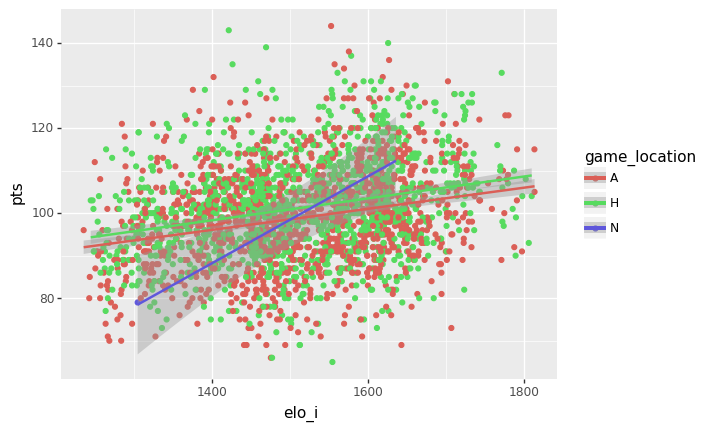

<ggplot: (7546392809)>

In [16]:
ggplot(data, aes(x = 'elo_i', y = 'pts', color = 'game_location')) + geom_point() + geom_smooth(method = 'lm')

The above plot shows elo entering a game against points scored. We can see that in general, teams with higher elo rating entering them game scored more points and teams that played on their home court tended to do better than teams that played away. We also that that teams that played at a neutral court showed the strongest positive relationship between elo and points, this is likely due to the fact that only 4 games were entered as neutral as seen in the output below.

In [20]:
data['game_location'].value_counts()

H    1309
A    1309
N       4
Name: game_location, dtype: int64

We'll plot the same graph but color the points by game_result.

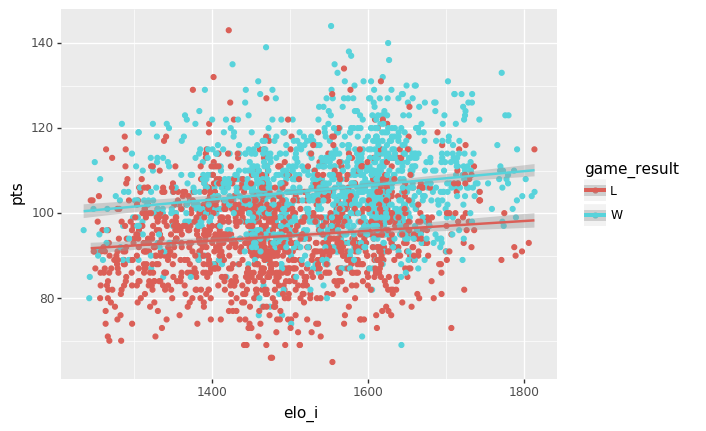

<ggplot: (7546051609)>

In [26]:
ggplot(data, aes(x = 'elo_i', y = 'pts', color = 'game_result')) + geom_point() + geom_smooth(method = 'lm')

- We can see that the game_result is mostly separated by points, teams that scored higher points tended to win, so we'll plot that later.
- We'll also check the point and elo distribution, we need to only check the elo distribution for one attribute as opponent and team distribution should be the same.

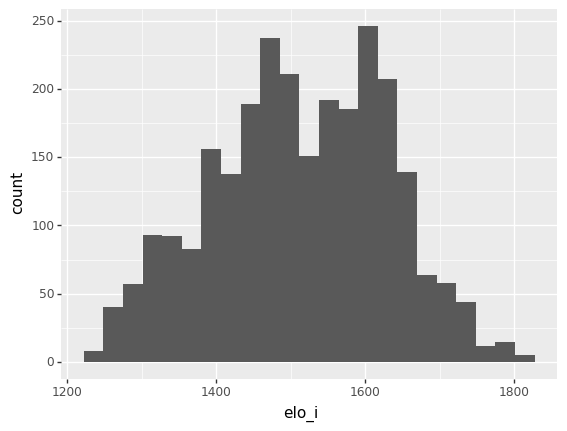

<ggplot: (7547709881)>

In [21]:
ggplot(data, aes(x = 'elo_i')) + geom_histogram()

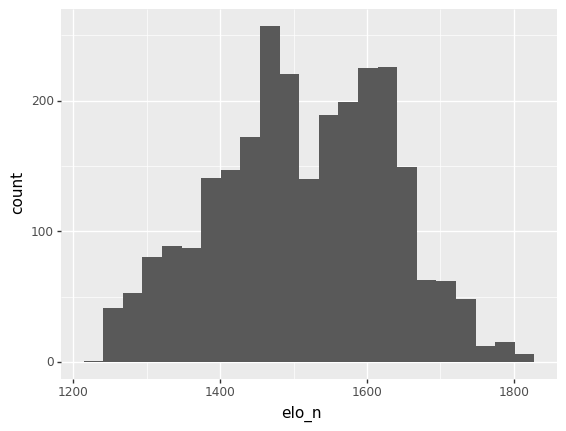

<ggplot: (7547987153)>

In [22]:
ggplot(data, aes(x = 'elo_n')) + geom_histogram()

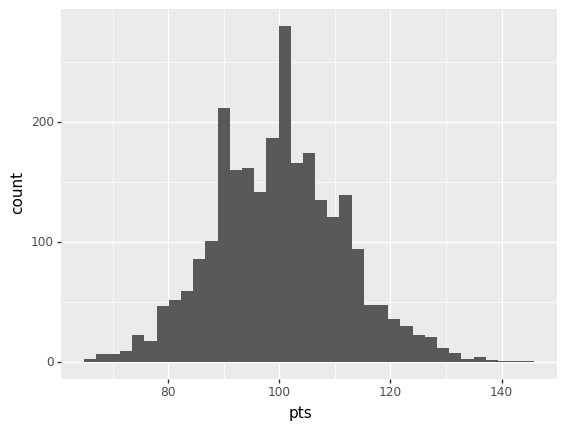

<ggplot: (7546079645)>

In [23]:
ggplot(data, aes(x = 'pts')) + geom_histogram()

Distributions are relatively normal with elo appearing to average at about 1500, which is expected as that was the same in the describtion of elo ratings. Points appeared to average around 100.

We should also plot the forecast attribute against the elo attribute and color the plot by game_result.

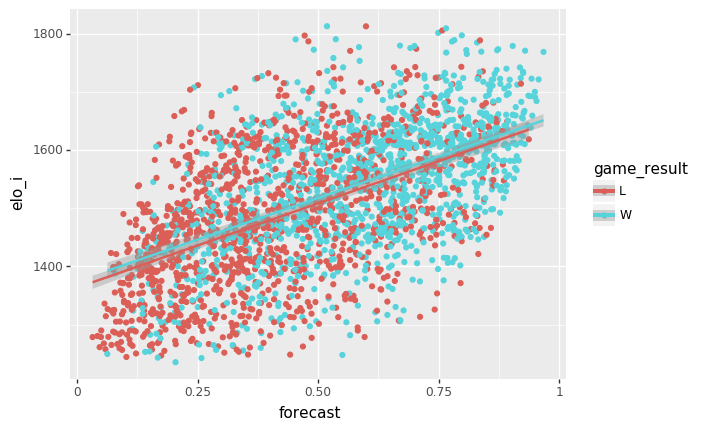

<ggplot: (7548091333)>

In [28]:
ggplot(data, aes(x = 'forecast', y = 'elo_i', color = 'game_result')) + geom_point() + geom_smooth(method = 'lm')

It appears that the forecast attribute is somewhat accurate. 
We see that teams with a lower elo generally had a lower forcast and their game resulted in a loss. Teams with a higher elo generally had a higher forecast and their game resulted in a win.

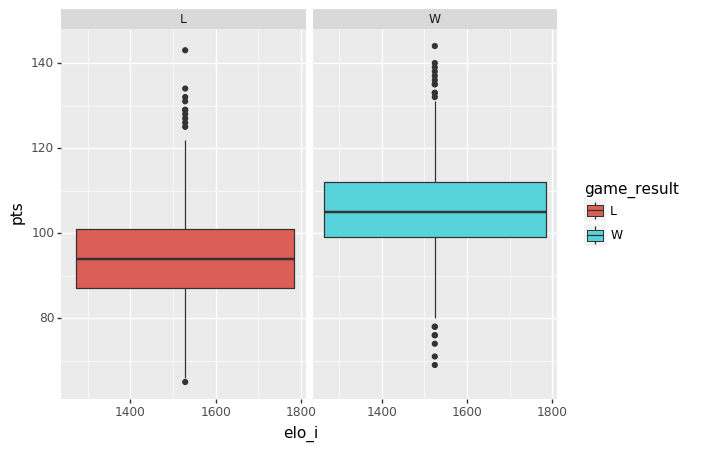

<ggplot: (7548064813)>

In [33]:
ggplot(data, aes(x = 'elo_i', y = 'pts', fill = 'game_result')) + geom_boxplot() + facet_wrap('game_result')

We can see from the above plot that teams who scored higher tended to win more despite their elo rating, we also see that there are quite a few outliers in the data.

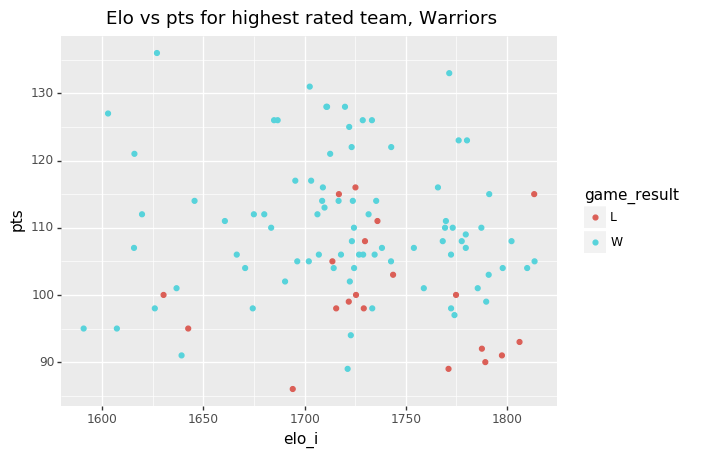

<ggplot: (7549138801)>

In [35]:
(
ggplot(data.loc[data['team_id'] == 'GSW'], 
       aes(x = 'elo_i', y = 'pts', color = 'game_result')) + 
       geom_point() + labs(title = "Elo vs pts for highest rated team, Warriors")
)

The Golden Stated Warriors held the highest elo rating in the dataset, from the plot above we can see that they won most of the games they played, however there does not appear to be any real correlation between their points and elo or the game result, but over time, since they held the highest rating , we see that they won the majority of their games below the 1700 elo level.

### Predictions
After completing the initial analysis it would be interesting to be able to predict the points scored and after game elo rating of a team, additionally and probably most important would be to be able to predict if a team wins or loses based on the given data.